In [1]:
import pandas as pd
from pathlib import Path

In [2]:
path = Path('Data/')

In [3]:
df = pd.read_feather('Data/May2015_subset.fthr')

/home/gokul/anaconda3/lib/python3.6/site-packages/pandas/io/feather_format.py:112: FutureWarning: `nthreads` argument is deprecated, pass `use_threads` instead
  return feather.read_dataframe(path, nthreads=nthreads)


In [4]:
df.tail(3).T

,6195169,6195170,6195171
created_utc,1433116781,1433116784,1433116785
ups,170,9,37
subreddit_id,t5_2qh13,t5_2qh13,t5_2qh13
link_id,t3_37zl5z,t3_380j06,t3_37z0mw
name,t1_crrbedn,t1_crrbefm,t1_crrbeft
score_hidden,0,0,0
author_flair_css_class,None,None,None
author_flair_text,None,None,None
subreddit,worldnews,worldnews,worldnews
id,crrbedn,crrbefm,crrbeft


# What is t1, t3, and t5 ?
$t_i$ are 
<img src="images/reddit_API.png" alt="Drawing" style="width: 200px;"/>

In [5]:
f"{df.memory_usage(deep=True).sum() / 1023.0**3} GB"

'5.128976683577038 GB'

! Ohh, let's reduce those memory footprint.

In [6]:
df.shape

(6195172, 22)

In [9]:
df['subreddit'] = df.subreddit.astype('category')
df['subreddit_id'] = df.subreddit_id.astype('category')
df['author_flair_css_class'] = df.author_flair_css_class.astype('category')
df['distinguished'] = df.distinguished.astype('category')
df['link_id'] = df.link_id.astype('category')

# df.drop(['archived'], inplace=True) # Only one value i.e. 0
df = df[~(df.body == '[deleted]')]  # remove [deleted] comments
df.drop(['retrieved_on'], axis=1, inplace=True)
df.drop(['id'], axis=1, inplace=True)

In [10]:
df.shape

(5703706, 20)

In [11]:
df.columns

Index(['created_utc', 'ups', 'subreddit_id', 'link_id', 'name', 'score_hidden',
       'author_flair_css_class', 'author_flair_text', 'subreddit',
       'removal_reason', 'gilded', 'downs', 'archived', 'author', 'score',
       'body', 'distinguished', 'edited', 'controversiality', 'parent_id'],
      dtype='object')

In [12]:
df.removal_reason.unique()

array([None, 'legal'], dtype=object)

In [13]:
f"{df.memory_usage(deep=True).sum() / 1023.0**3} GB"

'3.1790213339480395 GB'

In [15]:
assert len(df.subreddit_id.unique()) == len(df.subreddit.unique())

In [16]:
# No comments in a subreddits
df.subreddit.value_counts()

leagueoflegends      1155952
funny                 695296
todayilearned         489510
news                  483832
worldnews             445479
movies                357404
gaming                329248
politics              231662
anime                 212998
explainlikeimfive     195420
gameofthrones         177163
motorcycles            86454
tf2                    74232
conspiracy             72686
sex                    68850
guns                   59279
comicbooks             58618
pokemon                57390
science                55016
food                   51488
starcraft              51238
mylittlepony           43395
skyrim                 39172
askscience             30946
space                  29858
facepalm               21069
community              19688
harrypotter            19423
circlejerk             19265
progresspics           12629
drunk                  12264
startrek               11801
offbeat                 9483
thewalkingdead          9216
lifehacks     

In [17]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [19]:
df['time'] = pd.to_datetime(df.created_utc, unit='s') 

/home/gokul/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
np.unique([i[:3] for i in df.name.unique()])

array(['t1_'], dtype='<U3')

In [21]:
np.unique([i[:3] for i in df.parent_id.unique()])

array(['t1_', 't3_'], dtype='<U3')

In [22]:
df_first_comment = df[['link_id', 'time']].groupby(by=['link_id']).min()

In [23]:
df_first_comment.shape

(262519, 1)

In [24]:
df_first_comment.head()

,time
link_id,
t3_11411c,2015-05-31 02:50:41
t3_17f129,2015-05-19 13:53:19
t3_17xepd,2015-05-07 19:51:30
t3_19l2pc,2015-05-11 22:30:10
t3_1aw2dx,2015-05-06 18:52:22


In [25]:
df_first_comment_dict = df_first_comment.to_dict('index')

In [26]:
def time_lapse(x):
    return df_first_comment_dict[x]['time']

In [27]:
time_lapse('t3_11411c')

Timestamp('2015-05-31 02:50:41')

In [28]:
df['time_lapse'] = df.time - df.link_id.apply(time_lapse)

/home/gokul/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
df.tail(5).T

,6195167,6195168,6195169,6195170,6195171
created_utc,1433116778,1433116780,1433116781,1433116784,1433116785
ups,1,1,170,9,37
subreddit_id,t5_2qh13,t5_2qh13,t5_2qh13,t5_2qh13,t5_2qh13
link_id,t3_37z0mw,t3_37z0mw,t3_37zl5z,t3_380j06,t3_37z0mw
name,t1_crrbebf,t1_crrbecs,t1_crrbedn,t1_crrbefm,t1_crrbeft
score_hidden,0,0,0,0,0
author_flair_css_class,NaN,NaN,NaN,NaN,NaN
author_flair_text,None,None,None,None,None
subreddit,worldnews,worldnews,worldnews,worldnews,worldnews
removal_reason,None,None,None,None,None


In [30]:
df.time_lapse = df.time_lapse.apply(lambda x: x.seconds)

/home/gokul/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


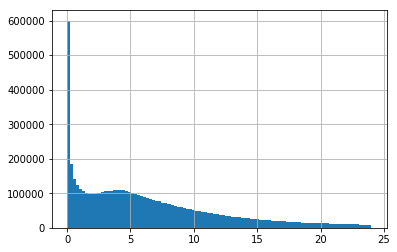

In [31]:
(df.time_lapse / (60*60)).hist(bins=100)

#### Create New Features  
1) links to other subreddit  
2) domain name of linked urls  
3) no urls links  
4) no of subbreddit links  
5) word cound  
6) senti_neg  
7) senti_pos  
8) senti_compound  
9) senti_neu  
10) subjectivity  
11) parent comment feautures  
12) word to vectors  
13) time elapsed  
14) unique words  
15) no of puntuations  
16) 
a) *authorkarma*


In [ ]:
df.loc[:10, ['name', 'parent_id']].to_dict('records')